<a href="https://colab.research.google.com/github/VishalShah1999/Visulization_ML/blob/main/vs2530_Homework_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 6
## Black Box Explainability

In this homework, you will be using the [Census Data Set](https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv), which is a `.csv` where each row is a person part of the US census. We call this data set in automatically (you do not need to upload it here).

If there is code that requires a random seed please set it to `2022`.

Please DO NOT change the code below. Start at question 1.

In [1]:
!pip install lime shap

     |████████████████████████████████| 275 kB 4.3 MB/s 
     |████████████████████████████████| 564 kB 21.8 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=496b5be3f3a9de7a8031aca0c71583e564038d1ae63757c9a6f245e125f18a31
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

df.drop(df[df['Native_country'] == ' ?'].index,inplace=True)
df.drop(df[df['Occupation'] == ' ?'].index,inplace=True)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier

le = LabelEncoder() # label encoder 
df['Income'] = le.fit_transform(df['Income'])
df['Sex'] = le.fit_transform(df['Sex'])

#df = pd.get_dummies(df, drop_first=True)
df = df.drop(["Education", "Workclass", "Marital_status", "Race", "Native_country", "Relationship", "Occupation"], axis=1)

X = df.drop(['Income'], axis=1)

s = MinMaxScaler()
X[X.columns] = s.fit_transform(X[X.columns])

y = df['Income']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.33, random_state=2022)

clf = MLPClassifier(max_iter=100, random_state=2022)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(max_iter=100, random_state=2022)

# Question 1 (LIME Explanation)

Please generate and visualize the LIME explanation for the third item in `X_test`. Use `100` samples and `3` features.

In [3]:
import lime
import lime.lime_tabular

In [6]:
# Train an LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(X_train),
            feature_names=X.columns, 
            class_names=['Income'], 
            discretize_continuous=True,
            verbose=True,
            mode='regression',
            random_state=2022
          )

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  "X does not have valid feature names, but"


Intercept 0.9584026135560451
Prediction_local [0.09227402]
Right: 0


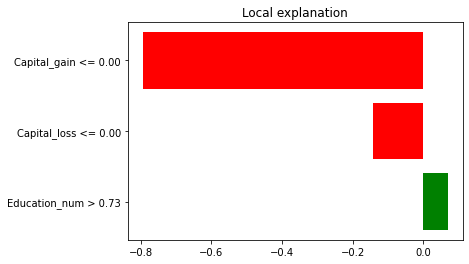

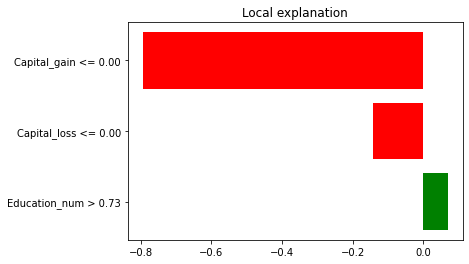

In [8]:
exp = explainer.explain_instance(X_test.iloc[2], clf.predict, num_features=3, num_samples=100)
exp.as_pyplot_figure()

# Question 2 (LIME)
Please answer the following questions concerning LIME parameters:

Q1: What are downsides to having too low number of samples?

Q2: What are downsides to having too high number of samples?

Q3: What are downsides to having too low number of features?

Q4: What are downsides to having too high number of features?

# Question 3 (SHAP)

Generate SHAP values for the first 100 samples in `X_test` using `nsamples=50`. Then, generate a dependence plot for any feature of your choice. You can use `shap.sample(data, K)` or `shap.kmeans(data, K)` to summarize your data. This will decrease the computation time of SHAP values. Then, please generate the summary bar plot of the mean SHAP values on `X_test`. 

For this question and Q4 and Q5, please use KernelExplainer with default parameters.

# Question 4 (SHAP)

Generate a dependence plot for any feature of your choice. 

Please DESCRIBE YOUR PLOT AND ANY RELATIONSHIP YOU MAY SEE VIA TEXT IN A SEPARATE COLAB CELL.

# Question 5 (SHAP)

Please create the summary force plot for `X_test`. What clusters of instances do you see? Please order by similarity.